# Задание 1. (2 балла)
Преобразуйте таблицу с абсолютными частотностями в семинарской тетрадке в таблицу с tfidf значениями. (Таблица - https://i.ibb.co/r5Nc2HC/abs-bow.jpg) Формула tfidf есть в семинаре на картнике с пояснениями на английском. 
Можно считать в google sheets, екселе, питоне или на листочке. Сделайте скрин получившейся таблицы и загрузите картинку на гитхаб, вставьте ссылку в поле ниже.



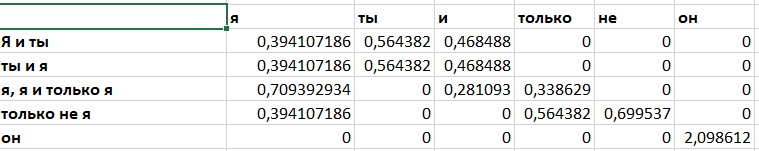

# Задание 2. 
а) Посчитайте близость между 3 и 12666 текстами в датасете (labeled.csv из семинара) 
б) найдите 3 самых близких текста к тексту номер 43; выведите сами тексты и значения близостей, а не только индексы этих текстов. 
Векторизовать можно любым способом, но постарайтесь, чтобы 1 и 0 не получались в близостях.
Результат запишите в тетрадке.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df = pd.read_csv('data/labeled.csv')
df.comment = df.comment
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [ ]:
# а) Посчитайте близость между 3 и 12666 текстами в датасете (labeled.csv из семинара)

vectorizer = TfidfVectorizer() # Посмотрим просто на дефолтных настройках
X = vectorizer.fit_transform(df.comment)

In [ ]:
X.shape, df.shape

((14412, 68423), (14412, 2))

In [ ]:
ids = np.array([3,12666])
selected = X[ids,:]
print(df.iloc[3].comment)
print(df.iloc[12666].comment)
cosine_similarity(selected) # косинусная близость между двумя текстами 0.27

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

Это не параноик, это дебил



array([[1.        , 0.27330886],
       [0.27330886, 1.        ]])

In [ ]:
# б) найдите 3 самых близких текста к тексту номер 43; выведите сами тексты и значения близостей, а не только индексы этих текстов.
X_cosine = cosine_similarity(X)
top_similar = X_cosine[43].argsort()[::-1][1:4]


print(f"Initial text: {df.iloc[43].comment}")
for _id in top_similar:
    print(f"{df.iloc[_id].comment} : {X_cosine[43][_id]}\n")

Initial text: Люди зажрались и охуели если по мнению этих игроков андромеда лучше Антема. Хотя че там с багаутом76 сравнивают вон... Вот оно че оказывается, игроки просто охуели, ну ок. Вот долбанные пидерасы, не хотят покупать такую отличную игру, а еще смеют ругать такой божественный геймплей. Баги, хуевый геймплей поправят, а контент, ну его запилят, через год другой, причем бесплатно! Ага. Стоит лишь потерпеть!

НУ И КАКАЯ МРАЗЬ КИДАЕТ ССЫЛКИ? ОХУЕЛИ ТАМ В КРАЙ УЖЕ?
 : 0.16043982092396117

Че за бригада и че за махоун? Из полицейской академии? : 0.11789148760536666

Герка ебет только даунов которые игрли а него. Ибо и геймплей и сюжетто кусок говна.
 : 0.11409080923099105



# Задание 3. 
Обучите 2 любых разных классификатора из семинара. Предскажите токсичность для текстов из 2ch_corpus.txt (второй семинар) и найдите 10 самых токсичных для каждого из классификаторов. Сравните получаемые тексты - какие тексты совпадают, какие отличаются, правда ли тексты токсичные?
*Можете предсказывать не все данные, но не менее 2500.

Требования к классификаторам:
а) один должен использовать CountVectorizer, другой TfidfVectorizer
б) у векторазера должны быть вручную заданы как минимум 5 параметров
в) у классификатора должно быть задано вручную как минимум 2 параметра
г)  f1 мера каждого из классификаторов должна быть минимум 0.75

## Первый классификатор (Count-Vectorizer)

In [ ]:
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [119]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
vect_count = CountVectorizer(ngram_range=(1,2), max_df=0.85, min_df=2,
                             stop_words=_stopwords, analyzer='char_wb')
X_train, X_test, y_train, y_test = train_test_split(df.comment, df.toxic, test_size=0.1, shuffle=True, random_state=23)
X_train = vect_count.fit_transform(X_train)
X_test = vect_count.transform(X_test)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12970, 2475), (1442, 2475), (12970,), (1442,))

In [129]:
clf_lr = LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000)
clf_lr.fit(X_train, y_train)

preds = clf_lr.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       931
         1.0       0.71      0.83      0.76       511

    accuracy                           0.82      1442
   macro avg       0.80      0.82      0.81      1442
weighted avg       0.83      0.82      0.82      1442



## Второй классификатор (TfIdf-Vectorizer)

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

vect_tfidf = TfidfVectorizer(ngram_range=(1,2), max_df=0.7, min_df=2,
                             stop_words=_stopwords, analyzer='word',
                             norm='l1')
X_train, X_test, y_train, y_test = train_test_split(df.comment, df.toxic, test_size=0.1, shuffle=True, random_state=123)
X_train = vect_tfidf.fit_transform(X_train)
X_test = vect_tfidf.transform(X_test)

In [126]:
clf_knn = KNeighborsClassifier(n_neighbors=8, 
                           weights='distance',
                           metric='cosine')
clf_knn.fit(X_train, y_train)
preds = clf_knn.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       897
         1.0       0.79      0.72      0.76       545

    accuracy                           0.82      1442
   macro avg       0.82      0.80      0.81      1442
weighted avg       0.82      0.82      0.82      1442



In [ ]:
#  Предскажите токсичность для текстов из 2ch_corpus.txt (второй семинар) и найдите 10 самых токсичных для каждого из классификаторов. 
# Сравните получаемые тексты - какие тексты совпадают, какие отличаются, правда ли тексты токсичные? 
# *Можете предсказывать не все данные, но не менее 2500.

In [133]:
!unzip 2ch_corpus.txt.zip  -d data

Archive:  2ch_corpus.txt.zip
  inflating: data/2ch_corpus.txt     
  inflating: data/__MACOSX/._2ch_corpus.txt  


In [135]:
with open('data/2ch_corpus.txt', encoding='utf-8') as f:
    texts = f.readlines()[0:2500]

texts[:5]

[" Анимублядский WebM-треддля приличных анимублядей и прочих аутистов. Безграмотное быдло с дубляжом, войсовером, порнографией и котиками, советы мерзких мокрописечников, вниманиебляди всех видов и прочее непотребство отправляется в порнотред <ссылка>.Для поиска сoуса видео сохраняем кадр (правый клик по видео) и ищем его на Для воспроизведения WebM с 10-битным цветом нужно установить плагин vlc ( ) и отключить встроенный в браузер плеер (media. webm. enabled=false в firefox).О кодировании WebMДоступные кодеки — VP8 и VP9 для видео, Vorbis и Opus для звука, максимальный размер файла — 10240КБ, всех файлов в посте — около 40МБ. Делать WebM можно научиться в вики треда: Там находится подробная информация о выборе и настройке кодеков на примерах использования консольных утилит ffmpeg, vpxenc и mkvmerge. Неочевидные моменты— libvorbis при указании битрейта (-b:a) работает в режиме CBR (постоянный битрейт), и это портит качество звука; для режима VBR вместо битрейта надо указывать качество 

In [172]:
def analyze_dvach(vectorizer, model, texts):

    X = vectorizer.transform(texts)

    preds = model.predict(X)
    pred_probs = model.predict_proba(X)

    top10_toxic = pred_probs[:,1].argsort()[::-1][:10]
    top10_toxic_probs = pred_probs[top10_toxic, 1]
    return top10_toxic, top10_toxic_probs

In [173]:
# Первый классификатор
top10_lr_count, probs = analyze_dvach(vect_count, clf_lr, texts)
top10_knn_tfidf, _probs = analyze_dvach(vect_tfidf, clf_knn, texts)

In [162]:
common = set(top10_lr_count) & set(top10_knn_tfidf)
print(common)

set()


Общих текстов не нашлось, посмотрим на топ каждой модели в отдельности

In [174]:
for _id, prob in zip(top10_lr_count, probs):
    print(prob)
    print(texts[_id])
    print('=========================')

1.0
  ВИЧУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУЧУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУЧУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУЧУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУУХА БЛЯЯЯЯЯЯЯЯ

0.9999996687680612
 Ёбаные советские названия блять. КРУЖКИ блять. Всегда ненавидел. Блять. Почему бы не сказать КЛУБ ПО ИНТЕРЕСАМ, как у япошек, нет блять, будем гуманитарную хуйню, сравнения блять, типа В КРУГ СОБРАЛИСЬ, ахахахаха кружок ахахахахаха))))) пиздец блять. Может при Сталине это звучало, но уже при Горбачёве это просто бесило, а сейчас это выглядит вообще как атавизм. Или ещё ебанутое слово СЛЁТ блять. Сука, СЛЁТ, почему слёт, а не съезд? Типа съезд - это для КПСС, не доросли ещё? Или типа в Совке так всё пиздато, что даже у школия есть своё самолёт? СЛЁТ сука, мы что, блять, стрижи? Или это какая-то аллегория на ёбаных ОРЛЯТ? Вот т

In [175]:
for _id, prob in zip(top10_knn_tfidf, _probs):
    print(prob)
    print(texts[_id])
    print('=========================')

1.0
 Сказать сходу "иди нахуй со своими загадками, петушня"

1.0
 Ты и собаке отсосал бы

1.0
 >Scala, Clojure, Erlang, Elixir, Common Lisp, Haskell, Ocaml, F#, Elm, Swift, Go, Rust, D, Nim, Scheme, SmalltalkМолодец, перечислил сложные для старта языки + на которых вакансий хуй хуй да нихуя. Сам-то с какого языка начинал? И наверное в гарварде и mit дауны сидят и учат людей сям и питону, сука на дваче, что не доска, так куча нитаких, как все даунов на хайпе, которые толкают свое говно. Нахуй иди.

1.0
 И здесь жопу порвешь.

1.0
 Тьфу на тебя, бвдло ебучее.

1.0
 Почему проебывал рус. яз?

1.0
  Не, он мерзкий. Да и я больше по тянам.

1.0
 ДРОПАЕШЬ ШЛЮХУ@ЖИВЕШЬ СВОБОДНООхуел он бля как такие тупые дибылы до денег дорываются? Женится на мрази пиздец просто.

1.0
 ебать он по каифу жиганит

1.0
 А мне можно? Я очень робкий и нежный...



Ну что тут сказать: вторая модель явно выделяет более токсичные комментарии  и более емкие, а первая модель больше тяготеет к длинным развернутым изложениям. Только не понятно, почему вторая модель отнесла коммент "А мне можно? Я очень робкий и нежный..." к токсичным, да еще и с такой большой вероятностью.